# 결정트리

- 장점
    - 쉽다. 직관적이다.
    - feature의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음
- 단점
    - 과적합으로 알고리즘 성능이 떨어진다. 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요
- 결정트리 Parameter
    - min_samples_split : 노드를 분할하기 위한 샘플 데이터 수로 과적합을 제어하는 사용됨
    - miin_samples_leaf :  말단 노드(lead)가 되기 위한 최소한의 샘플 데이터 수
    - max_feaures : 최적의 분할을 위해 고려할 최대 피처 개수.
    - max_depth : 트리의 최대 깊이를 규정
    - max_leaf_nodes : 말단 노드(leaf)의 최대 개수

- 더이상 자식 노드가 없는 노드는 리프(leaf) 노드이다. 리프 노드는 최종 클래스(레이블)값이 결정되는 노드이다.
    - 리프 노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족하면 된다.
- 자식노드가 있는 브랜치(branch)노드는 자식 노드를 만들기 위한 분할 규칙 조건을 가지고 있다.

## 붓꽃데이터로 DecisionTreeClassifier 이용해 학습

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터 로딩
iris= load_iris()

# 학습,테스트 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.2, random_state=11)

# 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

## Graphviz를 이용해 어떤 형태로 규칙 트리가 만들어지는지 확인

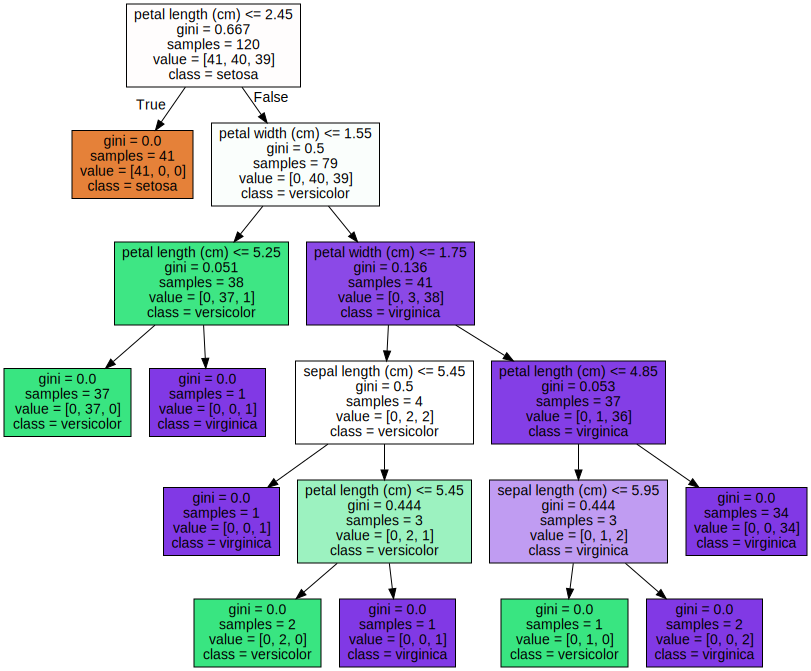

In [29]:
from sklearn.tree import export_graphviz

# export_graphviz호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris.target_names, 
               feature_names=iris.feature_names, impurity=True, filled=True)

import graphviz
# 생성한 tree.dot파일을 graphviz가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- 트리의 브랜치(branch)노트와 말단 리프(leaf)노드가 어떻게 구성되는지 한눈에 알 수 있게 시각화 되었다.
- petal lengh(cm) <= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건이다. 이 조건이 없으면 리프 노드임.
- gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수이다.
- samples는 현 규칙에 해당하는 데이터 건수이다.
- value=[]는 클래스 값 기반의 데이터 건수이다. 붓꽃 데이터 셋은 클래스 값으로 0,1,2를 가지고 있으며, 0:Setosa, 1:Versicolor, 2:Virginica 품종을 가리킴.
    - value=[41,40,39]라면 클래스 값의 순서대로 Setosa 41개, Versicolor 40개, Virginica 39개로 구성되어있다는 의미

- 1번 노드
    - samples=120은 전체 데이터가 120개
    - sample 120개는 각각 value 41,40,39 분포도로 되어 있으므로 지니 계수는 0.667
    - class = sotosa는 하위 노드를 가질 경우 setosa의 개수가 41개로 제일 많다는 의미

## 피처별로 결정 트리 알고리즘에서 중요도 추출

Feautre importance:
[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


<AxesSubplot:>

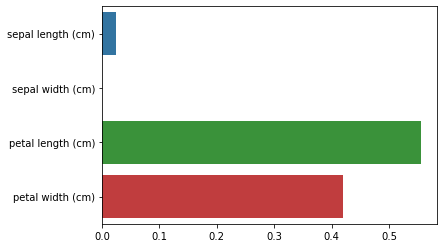

In [30]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feautre importance:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

# feature별 importance 매핑
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name,value))
    
# feature importance를 column별로 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

## 결정 트리 과적합(overfitting)

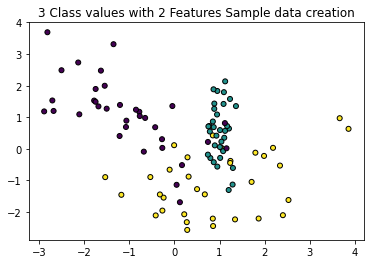

In [31]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 자표 시각화, 각 클래스 값은 다른 색으로 표현됨
plt.scatter(X_features[:,0], X_features[:,1],marker='o', c=y_labels, s=25, edgecolor='k')

In [32]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

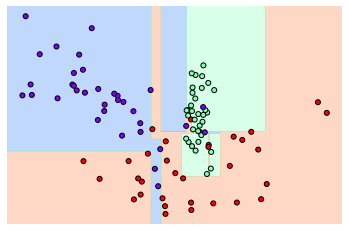

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- 매우 얇은 영역으로 나타난 부분은 이상치에 해당하는데, 이런 이상치까지 모두 분류하기 위해 분할한 결과 결정 기준 경계가 많아졌다.

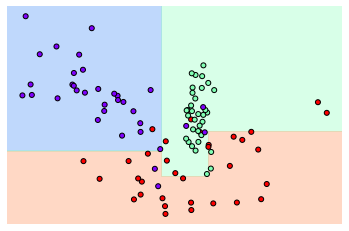

In [34]:
# min_samples_leaf = 6 으로 설정한 Decision Tree의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- default 값으로 실행한 앞선 경우보다 이상치에 크게 반응하지 않으면서 일반화된 분류 규칙에 의해 분류되었음을 확인할 수 있습니다.

## Decision Tree의 과적합을 줄이기 위한 파라미터 튜닝
- (1) max_depth 를 줄여서 트리의 깊이 제한
- (2) min_samples_split 를 높여서 데이터가 분할하는데 필요한 샘플 데이터의 수를 높이기
- (3) min_samples_leaf 를 높여서 말단 노드가 되는데 필요한 샘플 데이터의 수를 높이기
- (4) max_features를 높여서 분할을 하는데 고려하는 feature의 수 제한

# Decision Tree 실습
- 사용자 행동 인식 데이터 세트
    - 30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러 가지 피처를 수집한 데이터
    - 수집된 피처 세트를 기반으로 어떠한 동작인지 예측

- feature_info.txt 과 README.txt : 데이터 세트와 피처에 대한 간략한 설명
- features.txt : 피처의 이름 기술
- activity_labels.txt : 동작 레이블 값에 대한 설명

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [36]:
# 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백문자를 sep으로 할당
feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+',
                                header=None, names=['column_index', 'column_name'])

# 데이터프레임에 피처명을 컬럼으로 뷰여하기 위해 리스트 객체로 다시 반환 
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [37]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())

feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [55]:
# 중복된 피처 이름 바꾸기
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                 columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how="outer")
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                                              'dup_cnt']].apply(lambda x : x[0] + '_' + str(x[1]) 
                                                                                if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [56]:
# 데이터셋을 구성하는 함수 설정
def get_human_dataset():
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백문자를 sep으로 할당
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', 
                                  header=None, names=['column_index', 'column_name'])
    # 데이터프레임에 피처명을 컬럼으로 뷰여하기 위해 리스트 객체로 다시 반환
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # 데이터프레임에 피처명을 칼럼으로 부여하기 위해 리스트로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    # 학습 피처 데이터셋과 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', 
                          header=None, names=['feature_name'])
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', 
                          header=None, names=['feature_name'])
    
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep='\s+', 
                          header=None, names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep='\s+', 
                          header=None, names=['action'])
    #로드된 학습/테스트용 데이터 DataFrame 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7352 entries, (0.28858451, -0.020294171, -0.13290514, -0.9952786, -0.98311061, -0.91352645, -0.99511208, -0.98318457, -0.92352702, -0.93472378, -0.56737807, -0.74441253, 0.85294738, 0.68584458, 0.81426278, -0.96552279, -0.99994465, -0.99986303, -0.99461218, -0.99423081, -0.98761392, -0.94321999, -0.40774707, -0.67933751, -0.60212187, 0.92929351, -0.85301114, 0.35990976, -0.058526382, 0.25689154, -0.22484763, 0.26410572, -0.09524563, 0.27885143, -0.46508457, 0.49193596, -0.19088356, 0.37631389, 0.43512919, 0.66079033, 0.96339614, -0.14083968, 0.11537494, -0.98524969, -0.98170843, -0.87762497, -0.98500137, -0.98441622, -0.89467735, 0.89205451, -0.16126549, 0.12465977, 0.97743631, -0.12321341, 0.056482734, -0.37542596, 0.89946864, -0.97090521, -0.97551037, -0.98432539, -0.98884915, -0.91774264, -1.0, -1.0, 0.11380614, -0.590425, 0.5911463, -0.59177346, 0.59246928, -0.74544878, 0.72086167, -0.71237239, 0.71130003, -0.99511159, 0.99567491, -

In [41]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

## DecisionTreeClassifier를 이용해 동작 예측 분류를 수행

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복시마다 동일한 예측 결과 도출을 위해 난수값(random_state) 설정
dt_clf = DecisionTreeClassifier(random_state=156)

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print('Decision Tree 예측 정확도 : {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파리미터 추출
print('\nDecisionTreeClassifier 기본 하이퍼파라미터:\n', dt_clf.get_params())

Decision Tree 예측 정확도 : 0.3254

DecisionTreeClassifier 기본 하이퍼파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


## 결정 트리의 트리 깊이(Tree depth)가 예측 정확도에 주는 영향 확인

- 결정 트리는 분류를 위해 리프노드(클래스 결정 노드)가 될 수 있는 적합한 수준이 될 때까지 지속해서 트리의 분할을 수행하면서 깊이가 깊어진다.
- GridSearchCV를 이용해 사이킷런 결정 트리의 깊이를 조절할 수 있는 하이퍼 파라미터인 max_depth값을 변화시키면서 예측 성능을 확인 [6,8,10,12,16,20,24]

In [43]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[6,8,10,12,16,20,24],
          'min_samples_split':[16]} # min_samples_split은 16으로 고정

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1) # 교차검증은 5개 세트
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.3859
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 6, 'min_samples_split': 16}


In [44]:
# GridSearchCV 객체의 cv_results_속성을 df로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그떄의 테스트 셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.385897
1,8,0.373935
2,10,0.362780
3,12,0.359375
4,16,0.357740
5,20,0.360054
6,24,0.357605


In [46]:
max_depth = [6,8,10,12,16,20,24]

# max_depth값 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0}정확도: {1:.4f}'.format(depth,accuracy))

max_depth = 6정확도: 0.3641
max_depth = 8정확도: 0.3807
max_depth = 10정확도: 0.3743
max_depth = 12정확도: 0.3563
max_depth = 16정확도: 0.3431
max_depth = 20정확도: 0.3342
max_depth = 24정확도: 0.3315


In [49]:
params = {'max_depth':[8,12,16,20],
         'min_samples_split':[16,24]}

grid_cv=GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.3739
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [51]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.3807


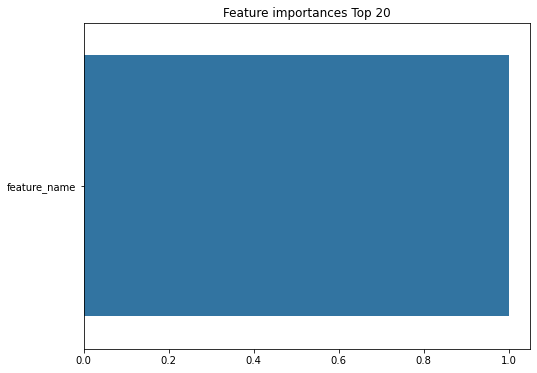

In [52]:
import seaborn as sns

ftr_importance_values = best_df_clf.feature_importances_
# top중요도로 정렬, series로 변환해서 seaborn 막대그래프로 표현
ftr_importance = pd.Series(ftr_importance_values, index=X_train.columns)

# 중요도값 순으로 series 정렬
ftr_top20 = ftr_importance.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()